# COMSOL to Matplotlib figures

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib inline
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import glob as glob
import re
import os

import scipy.optimize

import skimage.io
import skimage.filters
import skimage.morphology
import skimage.transform

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets

import pandas as pd

from tqdm.notebook import tqdm as tqdm

import panel as pn
pn.extension()


Phillips Group Plotting Style

In [95]:
rc = {'lines.linewidth': 1.25,
          'axes.labelsize': 16, # Modified originally 8
          'axes.titlesize': 18, # Modified originally 9
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 14, # Modified originally 7
          'ytick.labelsize': 14, # Modified originally 7
          #'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
           'legend.fontsize': 8,
           'figure.dpi': 300,
           'savefig.dpi': 300
     }

plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('xtick.major', pad=-1)
plt.rc('ytick.major', pad=-1)
plt.rc('mathtext', fontset='stixsans', sf='sansserif')
plt.rc('figure', figsize=[7, 5]) # Modified originally figsize=[3.5, 2.5]
plt.rc('svg', fonttype='none')
plt.rc('legend', title_fontsize='8', frameon=True, 
        facecolor='#E3DCD0', framealpha=1)
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set_context('notebook', rc=rc)

In [96]:
import matplotlib.pyplot as plt
import matplotlib as mpl

figwidth = 8
plt.rcParams["figure.figsize"] = [figwidth, figwidth * 1105 / 1920
                                  ]  # figure size in inches
plt.rcParams["lines.linewidth"] = 2  # line width in points
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"

plt.rcParams["font.style"] = "normal"
plt.rcParams["font.weight"] = "heavy"
plt.rcParams["font.size"] = 13.0
plt.rcParams["axes.labelweight"] = "bold"  # weight of the x and y labels
plt.rcParams["axes.spines.right"] = True
plt.rcParams[
    "axes.formatter.useoffset"] = True  # If True, the tick label formatter
plt.rcParams["xtick.major.size"] = 10  # major tick size in points
plt.rcParams["xtick.minor.size"] = 4  # minor tick size in points
plt.rcParams["xtick.direction"] = "in"  # direction in, out, or inout
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.major.size"] = 10  # major tick size in points
plt.rcParams["ytick.minor.size"] = 4  # minor tick size in points
plt.rcParams["ytick.direction"] = "in"  # direction in, out, or inout
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["legend.fontsize"] = 10
plt.rcParams[
    "legend.labelspacing"] = 0.1  # the vertical space between the legend entries in fraction of fontsize
plt.rcParams["legend.shadow"] = False
plt.rcParams[
    "legend.frameon"] = True  # whether or not to draw a frame around legend
plt.rcParams[
    'axes.unicode_minus'] = False  # fix glyph error by using normal hyphens
mpl.rc("figure", dpi=200)

color_background = '#E5E0D5'

In [180]:
file_path = '../../data/COMSOL/20221003_2Dss/'
file_name = 'ATP_Depletion_2D_steadystate-mot_im_D120_Lam=Raster_alph=K_Tau=Raster^2-div-D_gamma=1.5'
file_type = '.csv'
comment = '%'

ATP_prof_df = pd.read_csv(file_path + file_name + file_type, comment=comment, names=["position", "ATP Conc"])


In [181]:
ATP_prof_df

,position,ATP Conc
0,0.000000e+00,499.964372
1,5.736390e-07,499.964749
2,8.448868e-07,499.964901
3,9.261488e-07,499.964944
4,1.879086e-06,499.965468
...,...,...
5875,1.154529e-04,0.001145
5876,1.154537e-04,0.001145
5877,1.154545e-04,0.001145
5878,1.167268e-04,0.001145


In [182]:
file_type = '.txt'
text_info = pd.read_csv(file_path + file_name + file_type, names=["position", "ATP Conc"])

In [183]:
text_info.head(9)

,position,ATP Conc
0,% Model: 20221003-ATP_Depletion_2...,NaN
1,% Version: COMSOL 5.6.0.401,NaN
2,% Date: Oct 4 2022,13:43
3,% Dimension: 1,NaN
4,% Nodes: 5880,NaN
5,% Expressions: 1,NaN
6,% Description: Line graph,NaN
7,% cln2x,Height
8,% time 0-580,20s interval


In [184]:
t_start = 0
t_end = 580
interval = 20

numb_times = int((t_end+interval)/interval)
times = np.linspace(t_start, t_end, numb_times) #min
tot_points = len(ATP_prof_df['position'])
numb_points = int(tot_points/numb_times)
half_scale = int(ATP_prof_df['position'][numb_points-1] / 2)

time_ls = []
for t in times:
    for i in range(numb_points):
        time_ls.append(t)

In [185]:
print(tot_points)
print(numb_times)
print(numb_points)
print(len(time_ls))

5880
30
196
5880


In [186]:
ATP_prof_df['time (min)'] = time_ls

In [187]:
ATP_prof_df.head(numb_points)

,position,ATP Conc,time (min)
0,0.000000e+00,499.964372,0.0
1,5.736390e-07,499.964749,0.0
2,8.448868e-07,499.964901,0.0
3,9.261488e-07,499.964944,0.0
4,1.879086e-06,499.965468,0.0
...,...,...,...
191,1.154529e-04,499.987711,0.0
192,1.154537e-04,499.987711,0.0
193,1.154545e-04,499.987711,0.0
194,1.167268e-04,499.987688,0.0


In [188]:
ATP_prof_df['position'] = (ATP_prof_df['position'] - int(half_scale))*1000000

  0%|          | 0/30 [00:00<?, ?it/s]

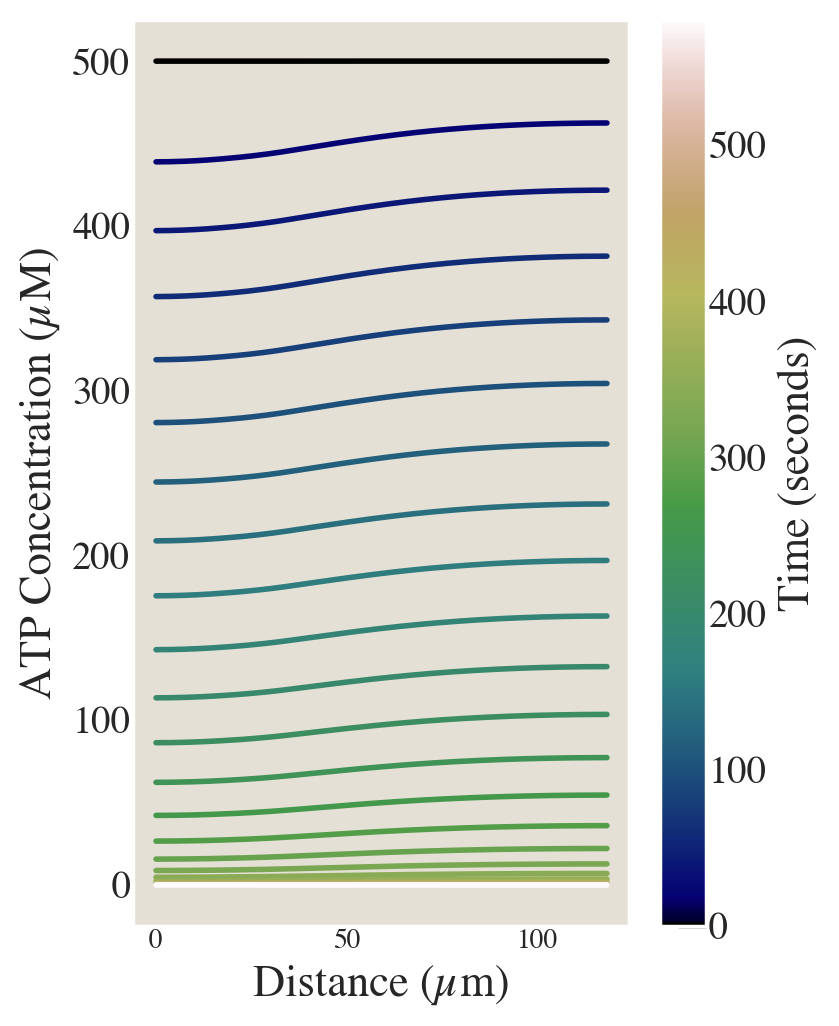

In [189]:
mod_num = 10

fig, ax = plt.subplots(figsize=(4, 6))

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=times.min(), vmax=times.max())
colormap = cm.gist_earth

for t in tqdm(times):
    if t%mod_num==0:
        pos_data = ATP_prof_df.loc[ATP_prof_df['time (min)'] == t, 'position'].values[:]
        conc_data = ATP_prof_df[ATP_prof_df['time (min)'] == t]['ATP Conc'].values[:]
        ax.plot(pos_data,
                 conc_data,
                 lw=2,
                 color = colormap(normalize(t)),
                 label=str(round(t, 1)))
ax.grid(None)
ax.axis('on')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='major', pad=1)

#plt.ylim(-0.1, 550)
#plt.xlim(-0.01, 1)
plt.xlabel('Distance (µm)')
plt.ylabel('ATP Concentration (µM)')
plt.xticks(fontsize= 10)
# plt.yticks(fontsize= 10);

# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(times)
cbar = plt.colorbar(scalarmappaple, label = "Time (seconds)")
cbar.ax.tick_params(pad=1)
ax.set_facecolor(color_background)
#plt.tight_layout()
#fig.savefig(file_path + file_name, dpi=300)

# Equation Input

In [190]:
file_path = '../../data/COMSOL/20221003_2Dss/'
file_name = 'ATP_Depletion_2D_steadystate-mot_eqn_D120_Lam=Raster_alph=K_Tau=Raster^2-div-D_gamma=1.5'
file_type = '.csv'
comment = '%'

ATP_prof_df = pd.read_csv(file_path + file_name + file_type, comment=comment, names=["position", "ATP Conc"])


In [191]:
ATP_prof_df

,position,ATP Conc
0,0.000000e+00,499.960635
1,5.736390e-07,499.960714
2,8.448868e-07,499.960796
3,9.261488e-07,499.960827
4,1.879086e-06,499.961560
...,...,...
15675,1.154529e-04,0.020108
15676,1.154537e-04,0.020108
15677,1.154545e-04,0.020108
15678,1.167268e-04,0.020113


In [192]:
file_type = '.txt'
text_info = pd.read_csv(file_path + file_name + file_type, names=["position", "ATP Conc"])

In [193]:
text_info.head(9)

,position,ATP Conc
0,% Model: 20221003-ATP_Depletion_2...,NaN
1,% Version: COMSOL 5.6.0.401,NaN
2,% Date: Oct 4 2022,13:49
3,% Dimension: 1,NaN
4,% Nodes: 15680,NaN
5,% Expressions: 1,NaN
6,% Description: Line graph,NaN
7,% cln2x,Height
8,%time 0-1580,time 20s


In [194]:
t_start = 0
t_end = 1580
interval = 20

numb_times = int((t_end+interval)/interval)
times = np.linspace(t_start, t_end, numb_times) #min
tot_points = len(ATP_prof_df['position'])
numb_points = int(tot_points/numb_times)
half_scale = int(ATP_prof_df['position'][numb_points-1] / 2)

time_ls = []
for t in times:
    for i in range(numb_points):
        time_ls.append(t)

In [195]:
print(tot_points)
print(numb_times)
print(numb_points)
print(len(time_ls))

15680
80
196
15680


In [196]:
ATP_prof_df['time (min)'] = time_ls

In [197]:
ATP_prof_df.head(numb_points)

,position,ATP Conc,time (min)
0,0.000000e+00,499.960635,0.0
1,5.736390e-07,499.960714,0.0
2,8.448868e-07,499.960796,0.0
3,9.261488e-07,499.960827,0.0
4,1.879086e-06,499.961560,0.0
...,...,...,...
191,1.154529e-04,499.998552,0.0
192,1.154537e-04,499.998552,0.0
193,1.154545e-04,499.998552,0.0
194,1.167268e-04,499.998596,0.0


In [198]:
ATP_prof_df['position'] = (ATP_prof_df['position'] - int(half_scale))*1000000

  0%|          | 0/80 [00:00<?, ?it/s]

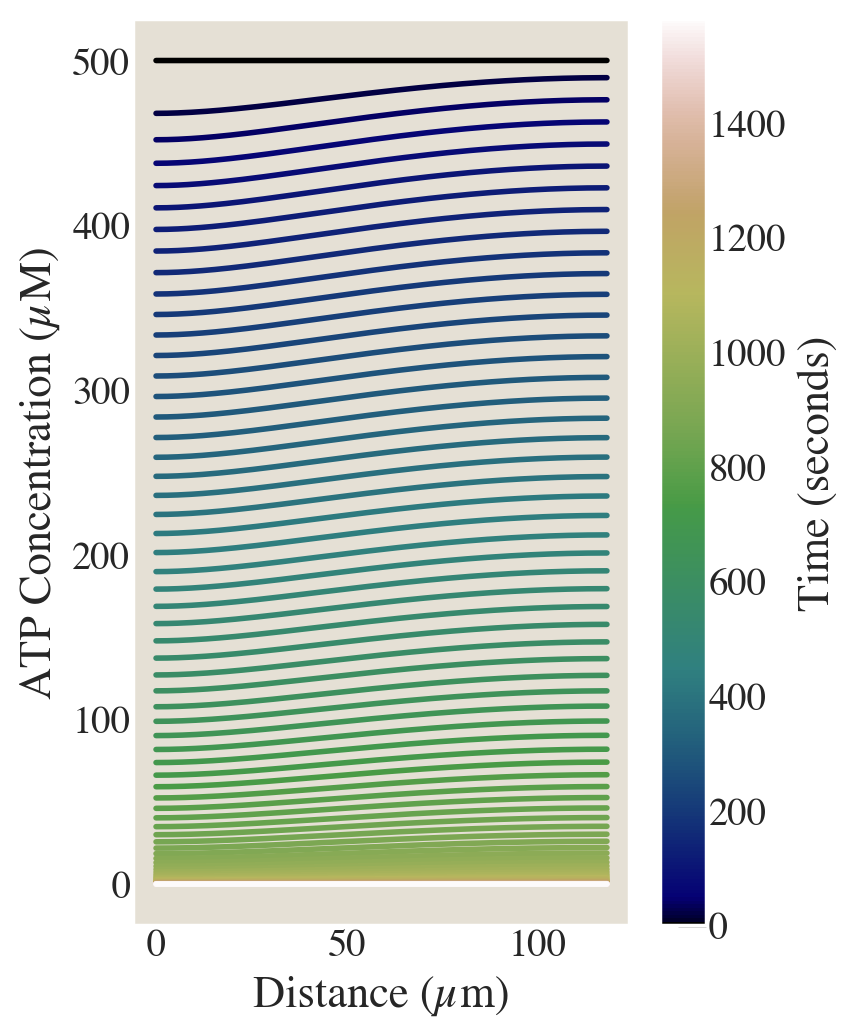

In [202]:
mod_num = 10

fig, ax = plt.subplots(figsize=(4, 6))

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=times.min(), vmax=times.max())
colormap = cm.gist_earth

for t in tqdm(times):
    if t%mod_num==0:
        pos_data = ATP_prof_df.loc[ATP_prof_df['time (min)'] == t, 'position'].values[:]
        conc_data = ATP_prof_df[ATP_prof_df['time (min)'] == t]['ATP Conc'].values[:]
        ax.plot(pos_data,
                 conc_data,
                 lw=2,
                 color = colormap(normalize(t)),
                 label=str(round(t, 1)))
ax.tick_params(axis='both', which='major', pad=1)
ax.grid(None)
#plt.ylim(-0.1, 550)
#plt.xlim(-0.01, 1)
plt.xlabel('Distance (µm)')
plt.ylabel('ATP Concentration (µM)')
# plt.xticks(fontsize= 10)
# plt.yticks(fontsize= 10);

# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(times)
cbar = plt.colorbar(scalarmappaple, label = "Time (seconds)")
cbar.ax.tick_params(pad=1)
ax.set_facecolor(color_background)
#plt.tight_layout()
#fig.savefig(file_path + file_name, dpi=300)

Text(0, 0.5, 'Motor Concentration (A.U.)')

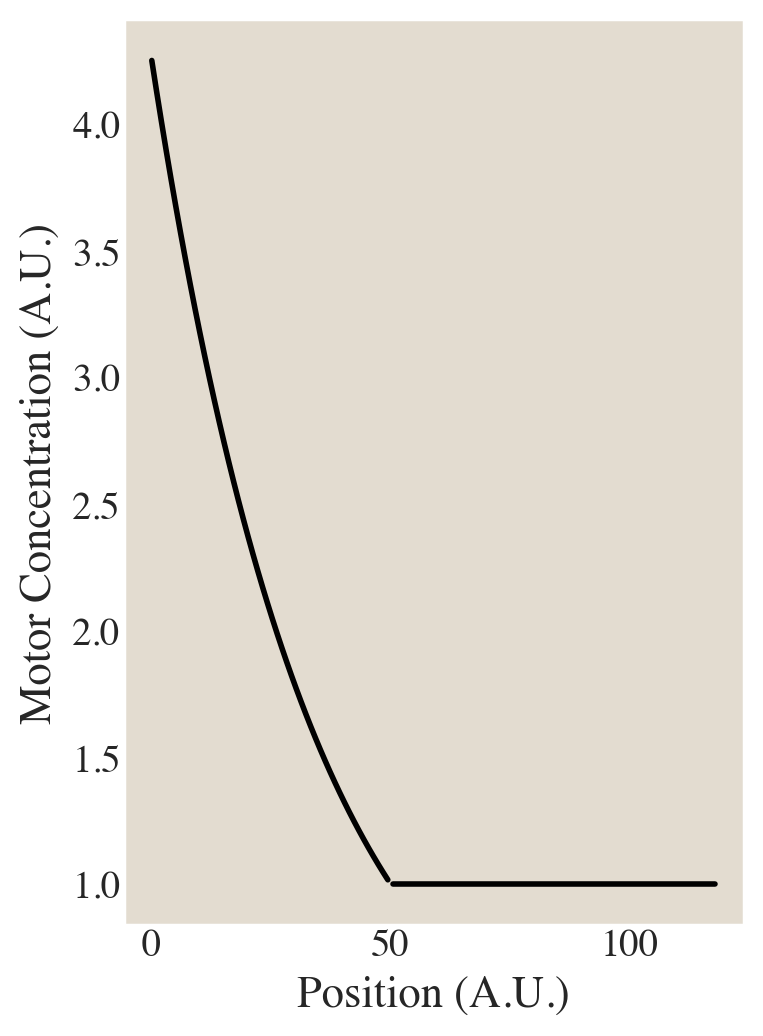

In [204]:
fig, ax = plt.subplots(figsize=(4, 6))

m0 = 1
R = 50
K = 60
lambda_ = 15
Lambda = R
coef = 0.434357915033
r = np.linspace(0, 118, 118)
r_non_dim = r/R
exp = (m0)*np.e**(coef*(R-r)/lambda_)
const = np.ones(118)*m0

# setup the normalization and the colormap
normalize = mcolors.Normalize(vmin=times.min(), vmax=times.max())
colormap = cm.gist_earth

ax.plot(r[:50],
         exp[:50],
         lw=2,
         color = colormap(normalize(0)),
         label=str(round(t, 1)))
ax.plot(r[50:],
         const[50:],
         lw=2,
         color = colormap(normalize(0)))
        
ax.grid(None)
ax.set_facecolor('#E3DCD0')
ax.tick_params(axis='both', which='major', pad=1)
#plt.ylim(-0.1, 9.0)
#plt.xlim(0.04, 2.4)
plt.xlabel('Position (A.U.)')
plt.ylabel('Motor Concentration (A.U.)')
# plt.xticks(fontsize= 10)
# plt.yticks(fontsize= 10);

#plt.tight_layout()
#fig.savefig(file_path + file_name, dpi=300)

In [59]:
m0 = 1
R = 50
K = 60
r = np.linspace(0, 100, 100)
exp = (m0/K)*np.e**((R-r)/R)
const = np.ones(100)*m0/K

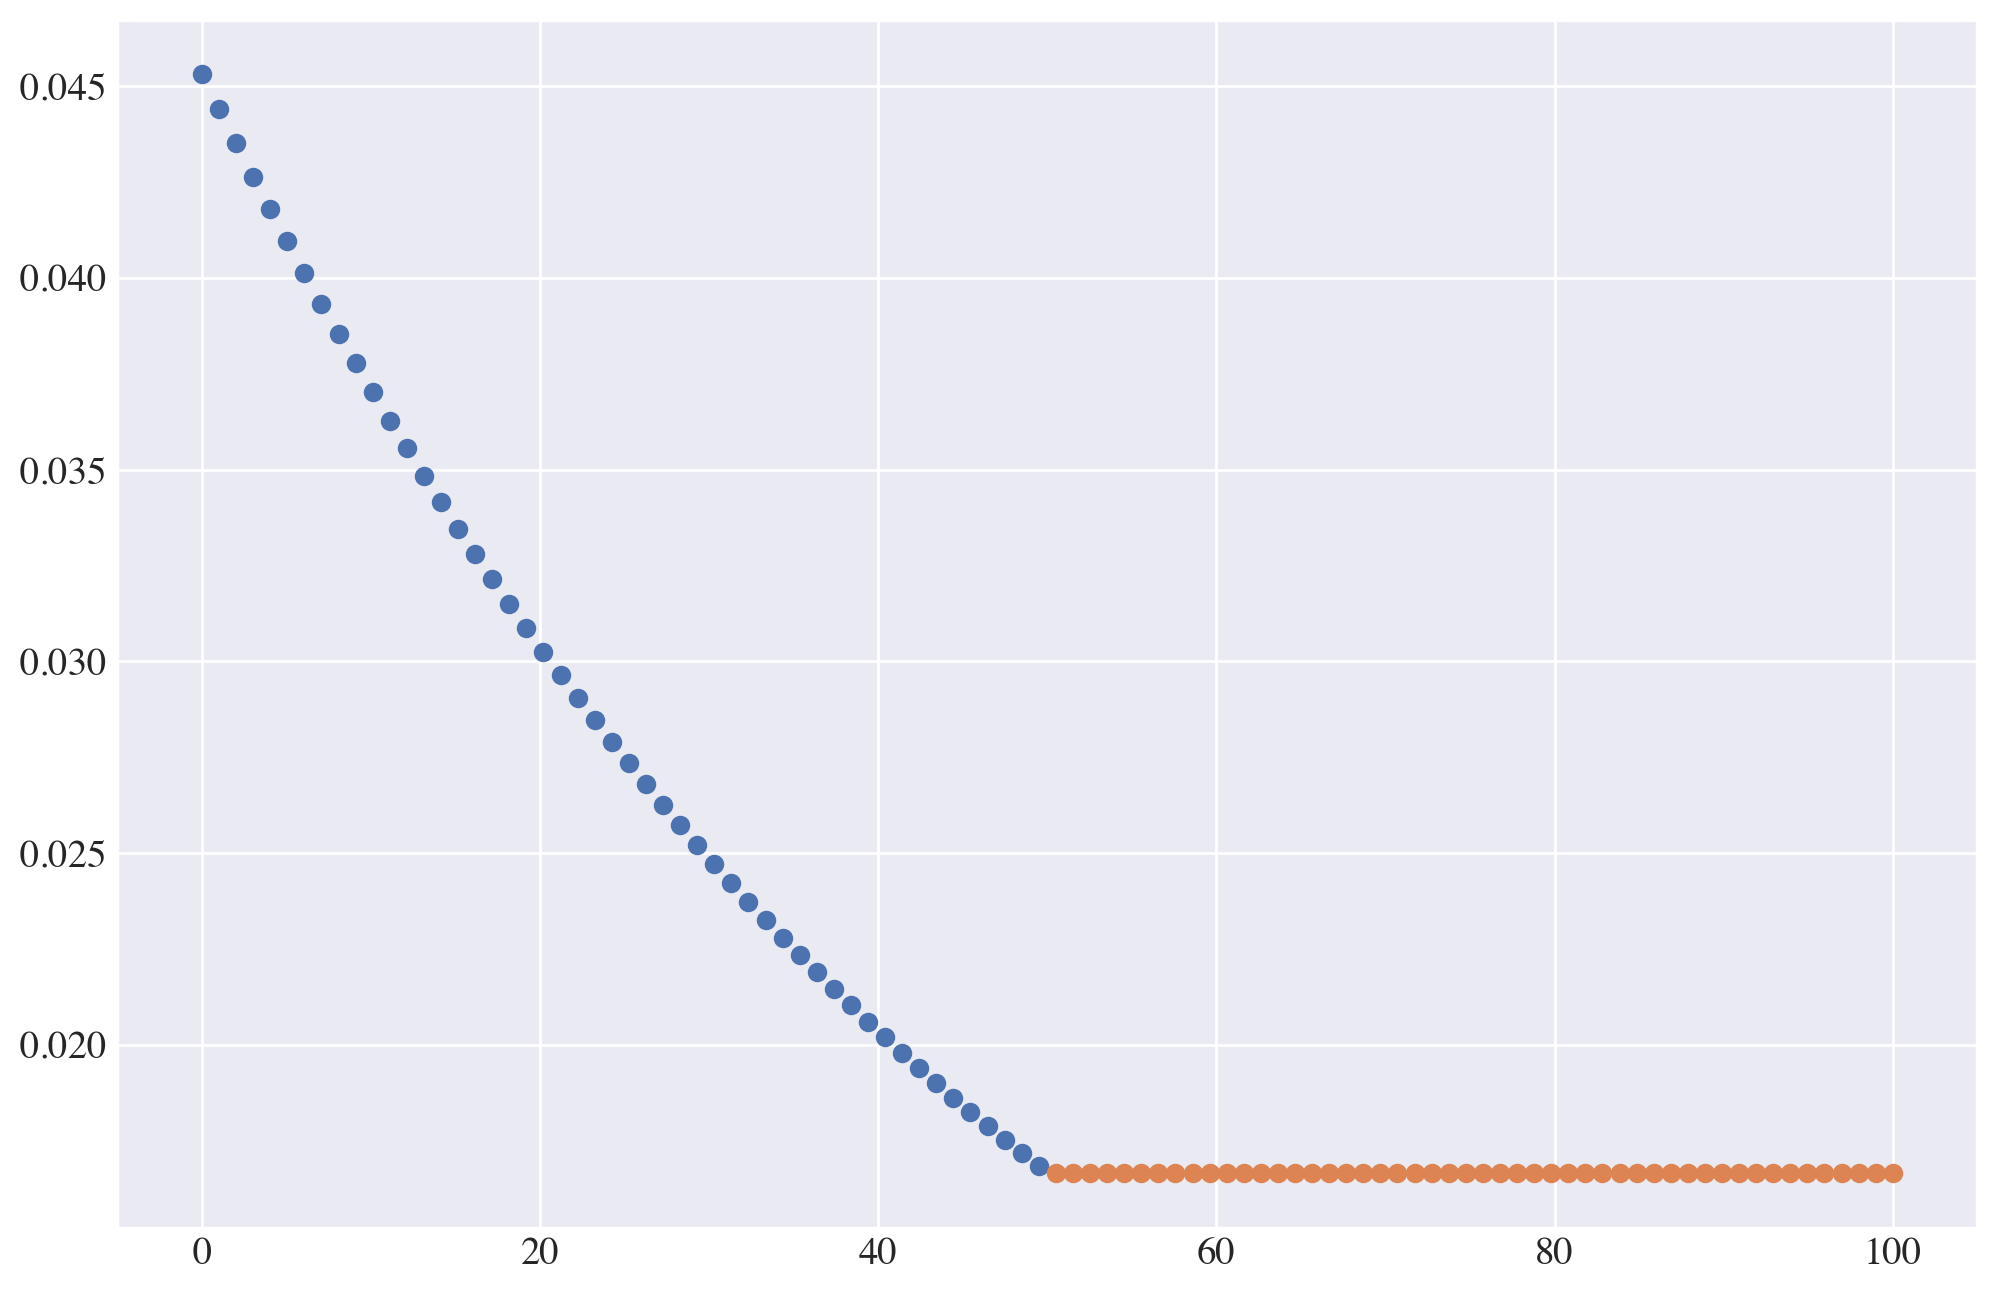

In [60]:
plt.scatter(r[:50], exp[:50])
plt.scatter(r[50:], const[50:])

Text(0.5, 0, 'time (s)')

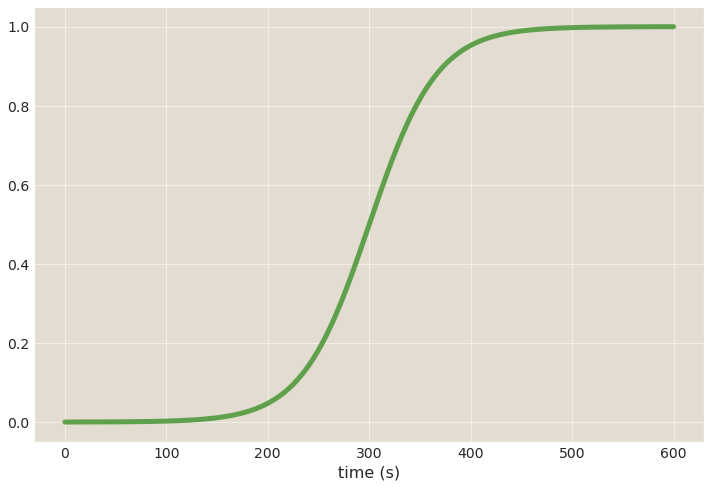

In [130]:
rand = np.linspace(0, 600, 600)
sigmoid = 1/(1+np.exp(0.03*(-rand+300)))
plt.plot(rand, sigmoid, lw=5, color=plt.cm.gist_earth(0.5))
plt.xlabel('time (s)')
